In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score


Reading in our Flight dataframe and printing out all the columns

In [2]:
flight_df = pd.read_csv("Flight_Experience.csv")
flight_df.head()
flight_df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Converting some of our char variables to numeric.
We chose which variables that would be 1 or 0 based on our correlation matrix in our analysis. 

In [3]:
flight_df["Gender"] = np.where(flight_df["Gender"] == "Female", 1, 0)
flight_df["Customer Type"] = np.where(flight_df["Customer Type"] == "Loyal Customer", 1, 0)

flight_df["Type of Travel"] = np.where(flight_df["Type of Travel"] == "Personal Travel", 0, 1)
flight_df["Class"] = np.where(flight_df["Class"] == "Business", 2, np.where(flight_df["Class"] == "Eco Plus", 1, 0))



Collect our features and split our data in half

In [4]:


features = flight_df[['Inflight entertainment', 'Ease of Online booking', 'On-board service', 'Online support', 'Leg room service', 'Seat comfort', 'Online boarding', 'Gender', 'Customer Type', 'Class']].to_numpy()
dependent = flight_df['satisfaction'].to_numpy()

 
x_train, x_test, y_train, y_test = train_test_split(features, dependent, random_state=0)


Let's look at the shape of our testing and training dataset

In [5]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (97410, 10)
Training Labels Shape: (97410,)
Testing Features Shape: (32470, 10)
Testing Labels Shape: (32470,)


Fit our models. Decided to use logistic regression because satisfied could be counted as 1 and dissatisfied could be 0. We also used decision tree and random forest classifer because we did not think our data was linearly separable or was there large apparent clusters. 

In [6]:
logreg = LogisticRegression()
decisiontree = DecisionTreeClassifier()
rf = RandomForestClassifier()


logreg.fit(x_train, y_train)
decisiontree.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier()

Use accuracy as our metric and performace score. Random forest had the highest. 

In [10]:


y_pred_log = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_log) 
print("Accuracy of Logistic Regression : ", accuracy)

y_pred_decisiontree = decisiontree.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred_decisiontree) 
print("Accuracy of Decision Tree : ", accuracy2)

y_pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf) 
print("Accuracy of Random Forest Classify : ", accuracy)



Accuracy of Logistic Regression :  0.8194333230674469
Accuracy of Decision Tree :  0.9228210655990144
Accuracy of Random Forest Classify :  0.928149060671389


Create confusion matrixes.

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Logistic Regression Confusion Matrix [[11610  3010]
 [ 2853 14997]]


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


[[13434  1186]
 [ 1320 16530]]


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


[[13425  1195]
 [ 1138 16712]]


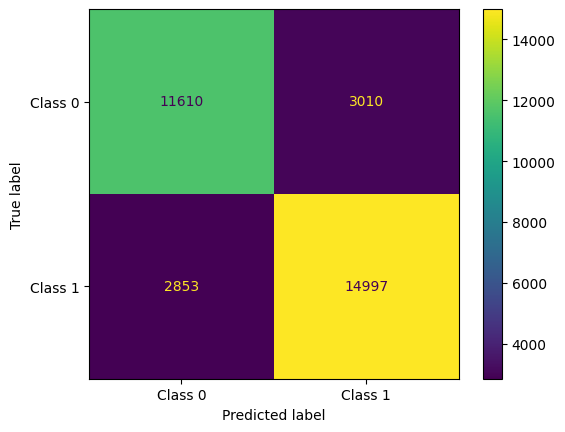

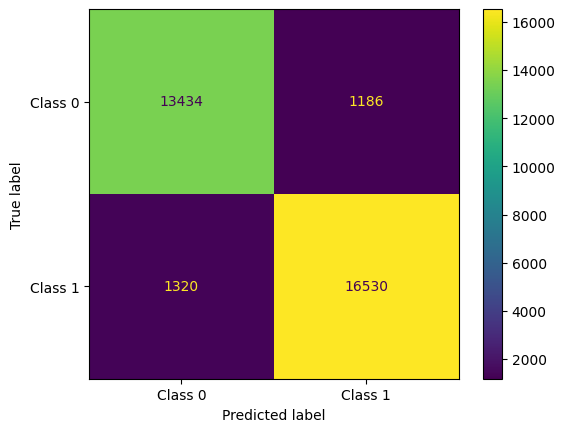

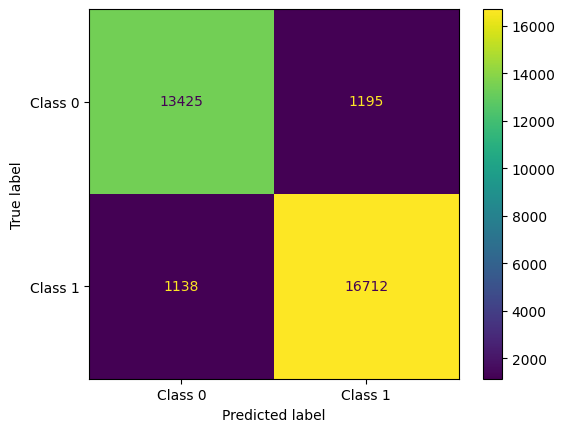

In [11]:
class_names = ["Class 0", "Class 1"]

disp = plot_confusion_matrix(logreg, x_test, y_test, display_labels=class_names)
print("Logistic Regression Confusion Matrix", disp.confusion_matrix) 

disp = plot_confusion_matrix(decisiontree, x_test, y_test, display_labels=class_names)
print(disp.confusion_matrix)

disp = plot_confusion_matrix(rf, x_test, y_test, display_labels=class_names)
print(disp.confusion_matrix)
